<a href="https://colab.research.google.com/github/MKolaksazov/Data-Science/blob/main/Colab%20code%20(graphs)/New_250526_Fluorescence_Parameters_Tukey_test_letters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Drawing a 'BOXPLOT' graph

Includes letters, showing the significant differences between variants, derived by the means of the Tukey's test.

Before everything else, parameters used inside this code should be defined. This is done to make corrections easier and avoid setting them inside the code.

In [ ]:
# THIS COLAB NOTEBOOK SHOULD BE USED TO CALCULATE AND DRAW THE PARAMETERS OF THE PROMPT FLUORESCENCE

#!sudo locale-gen en_US.UTF-8
#!sudo update-locale

In [32]:
# PARAMETERS
# export (converted csv)_(plant species)_(method)_(date).csv
#csv_file = '/content/export3.csv'

indexes = ['', 'Phi_Po', 'Phi_Eo', 'Phi_Ro', 'Phi_Do', 'Pi_Abs', 'Fo', 'Fm', 'RC/CSo', 'RC/CSm', 'ABS/RC', 'gamma_chl']

parameter = indexes[5] # required column

In [33]:
group_order = [
 'La_mono 21_V', 'La_mixed 21_V', 'Hv_mono 21_V', 'Hv_mixed 21_V',
 'La_mono 28_V', 'La_mixed 28_V', 'Hv_mono 28_V', 'Hv_mixed 28_V',
 'La_mono 14_VI', 'La_mixed 14_VI', 'Hv_mono 14_VI', 'Hv_mixed 14_VI',]

In [34]:
stacked = False
sorting = False
abbreviations = False

y_label = '[a.u.]'
title_main =  ''

sorting_labels = 'groups' # or 'group'

 # Използваме ordered set за да запазим уникалните елементи в реда на поява
group_order = list(dict.fromkeys(group_order))

# Отпечатваме резултата
print(group_order)

['La_mono 21_V', 'La_mixed 21_V', 'Hv_mono 21_V', 'Hv_mixed 21_V', 'La_mono 28_V', 'La_mixed 28_V', 'Hv_mono 28_V', 'Hv_mixed 28_V', 'La_mono 14_VI', 'La_mixed 14_VI', 'Hv_mono 14_VI', 'Hv_mixed 14_VI']


####1) importing of the libraries and the **.csv** file

The columns of this table file should containt parameters, whereas the group variants written as indexes of the rows. These indexes will be shown in the first column, named *'groups'*.

the delimiter is usually a semicolon ```;```, but can be a tabulation ```\t```


In [35]:
import pandas as pd
import numpy as np
import os

# Get the list of files in the current directory
files = os.listdir('.')

# Find the CSV file
csv_file = [file for file in files if file.endswith('.csv')][0]

# прочитане директно от изхода на приложението за обработка на сурови данни от апарата
df = pd.read_csv(csv_file, delimiter='\t', decimal='.', skiprows=5) # skiprow=5, when we have a raw data file
csv_file

'export_sm_24all_ojip_alt.csv'

In [36]:
# обработка на csv файла, така че да се преобразува във вида, подходящ за ползване от кода
df.set_index('index', inplace=True)
df = df.T
df = df.reset_index()
df = df.rename(columns={'index': 'groups'})
df['groups'] = df['groups'].apply(lambda x: x.split('.')[0])
df = df[~df['groups'].str.contains('Unnamed')]

In [37]:
df

index,groups,time,id,11,21,31,41,51,61,71,...,QY_Lss,QY_D1,QY_D2,QY_D3,QY_D4,QY_D5,QY_D6,QY_D7,NaN,NaN
0,La_mono 26_IV,12:44:18 26.4.2024,OJIP,390,6924,7054,7152,7249,7379,7477,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
1,La_mono 26_IV,12:44:37 26.4.2024,OJIP,390,6989,7119,7217,7347,7477,7575,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
2,La_mono 26_IV,12:45:02 26.4.2024,OJIP,390,7087,7217,7347,7445,7575,7705,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
3,La_mono 21_V,11:42:47 21.5.2024,OJIP,390,9103,9298,9493,9720,9948,10175,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
4,La_mono 21_V,11:43:23 21.5.2024,OJIP,390,8095,8225,8420,8582,8777,8940,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
5,La_mono 21_V,11:43:43 21.5.2024,OJIP,390,7965,8127,8290,8452,8615,8810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
6,La_mono 28_V,14:13:03 28.5.2024,OJIP,390,7054,7184,7314,7445,7575,7737,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
7,La_mono 28_V,14:12:41 28.5.2024,OJIP,390,6989,7119,7217,7379,7510,7640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
8,La_mono 28_V,14:12:21 28.5.2024,OJIP,390,7640,7802,7932,8095,8257,8387,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined
9,La_mono 14_VI,10:20:06 14.6.2024,OJIP,390,6924,7054,7184,7282,7412,7542,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,undefined,undefined


In [38]:
import re

def is_numeric(item):
  return isinstance(item, int) or (isinstance(item, str) and item.isdigit())

def unique_non_numeric_list(input_list):
  unique_list = []
  [unique_list.append(x) for x in input_list if x not in unique_list and not is_numeric(x)]
  return unique_list

In [39]:
# Get a list of rows to keep
rows_to_keep = df['groups'].apply(lambda x: x in group_order)

# Filter the DataFrame
df = df[rows_to_keep]

In [40]:
if (sorting):
  df = df.sort_values(by="groups", key=lambda column: column.map(lambda e: group_order.index(e)))

In [41]:
group_order

['La_mono 21_V',
 'La_mixed 21_V',
 'Hv_mono 21_V',
 'Hv_mixed 21_V',
 'La_mono 28_V',
 'La_mixed 28_V',
 'Hv_mono 28_V',
 'Hv_mixed 28_V',
 'La_mono 14_VI',
 'La_mixed 14_VI',
 'Hv_mono 14_VI',
 'Hv_mixed 14_VI']

1.2) Popping out the labels of the variation groups in a dataframe, called *'names'*.
Transposing the dataframe, so that it can be easily processed by the covariance test analysis and matplotlib. Converting it into numpy array.

In [42]:
# print the resulting DataFrame
#print(df)
named = np.array(df.pop(sorting_labels))
transposed_df = df

In [44]:
transposed_df[parameter].astype(float).max()

9.501

1.3) An optional step required to abbreviate the longer latin names of the crops, so that they can fit in the graph.

In [45]:
#ABBREVIATION
if abbreviations:
  try:
      print('before: ', named)
      import re
      # Abbreviating the latin names from 'Aaaaa aaaaaa (L.)' to 'A. aaaaaa (L.)'
      for i in range(len(named)):
          c = named[i][0]
          #named[i] = re.sub(r'[A-Z]([a-z]+ )', c + '. ', named[i])
          named[i] = "".join(re.findall(r'\b\w', named[i]))

      print('after: ', named)
  except:
      print(named.astype(int))
      named=named.astype(int)
      print('latin names not present')

1.4) Popping out the column with the desired parameter by writing the name in the 'pop' function, as well as transposing it.

This short code is used to perform calculations, based on the compound parameters, we would like to obtain from the original data. For example we would want to find out the values of the parameter 'RC/CS$_o$'. Thus, we can use the already present in the raw data 'F$_o$', 'ABS/RC' and divide them to obtain the needed parameter.

In [46]:
from logging import exception
#DERIVED PARAMETERS
def derivations(params, y_height=1, y_dist=1, title_main=''):
    Fi_params = df.pop('Fi').astype(int)
    Fo_params = df.pop('Fo').astype(int)
    Fm_params = df.pop('Fm').astype(int)
    ABS_params = df.pop('ABS/RC').astype(float)

    if params == 'Phi_Ro':
        y_height = 0.4 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Ro}$ '
        derived_params = (Fm_params- Fi_params)/Fm_params

    elif params == 'Phi_Eo':
        y_height = 0.7 # height of the graph
        y_dist = 0.2 # distance between labels
        title_main = '\u03C6$_{Eo}$ '
        derived_params = transposed_df[params]

    elif params == 'Phi_Po':
        y_height = 1 # height of the graph
        y_dist = 0.2 # distance between labels
        title_main = '\u03C6$_{Po}$ '
        derived_params = transposed_df[params]

    elif params == 'Phi_Do':
        derived_params = transposed_df[params].astype(float)
        y_height = np.round(derived_params.max(), 2)+0.02 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03C6$_{Do}$ '

    elif params == 'Pi_Abs':
        derived_params = transposed_df[params].astype(float)
        y_height = np.round(derived_params.max())+0.5 # height of the graph
        y_dist = 2 # distance between labels
        title_main = 'PI $_{ABS}$ '

    elif params == 'gamma_chl':
        y_height = 0.5 # height of the graph
        y_dist = 0.1 # distance between labels
        title_main = '\u03B3$_{chl}$'
        derived_params = 1/(ABS_params + 1)

    elif params == 'RC/CSo':
        y_height = 8000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'RC/CS$_O$'
        derived_params = Fo_params/ABS_params

    elif params == 'RC/CSm':
        y_height = 45000 # height of the graph
        y_dist = 10000 # distance between labels
        title_main = 'RC/CS$_M$'
        derived_params = Fm_params/ABS_params

    elif params == 'Fo':
        y_height = 17000 # height of the graph
        y_dist = 2000 # distance between labels
        title_main = 'ABS/CS$_O$ (F$_{O}$)'
        derived_params = Fo_params

    elif params == 'Fm':
        y_height = 90000 # height of the graph
        y_dist = 20000 # distance between labels
        title_main = 'ABS/CS$_M$ (F$_{M}$)'
        derived_params = Fm_params

    elif params == 'ABS/RC':
        y_height = np.round(ABS_params.max())+0.5 # height of the graph
        y_dist = 1 # distance between labels
        title_main = 'ABS/RC'
        derived_params = ABS_params

    else:
        params = df.pop(parameter) #required param
        derived_params = pd.to_numeric(params.T)

    data = pd.DataFrame({
        'Variant': named,
        'Value': derived_params
    })

    return data, y_height, y_dist, title_main

1.5) Converting the dataframe into a 1D numpy array

####2) arranging the data by samples column-wise and taking out the names of the variants in a different array

Converting the 2-D pandas dataframe into a 1-D numpy array. ```numpy.append(array1, array2) ``` can be used to append two arrays.

Probably ```pandas.dataframe.pop()``` can be used as well.

In [47]:
if not stacked:
  try:
      data, y_height, y_dist, title_main = derivations(parameter) #, y_height, y_dist, title_main)
  except Exception as e:
      print(e)
      params = df.pop(parameter) #required param
      derived_params = params.T #pd.to_numeric(params.T)
      print('no params')
      data = pd.DataFrame({
          'Variant': named,
          'Value': derived_params
      })

In [48]:
data

,Variant,Value
3,La_mono 21_V,4.292
4,La_mono 21_V,4.206
5,La_mono 21_V,5.689
6,La_mono 28_V,6.745
7,La_mono 28_V,6.630
8,La_mono 28_V,7.123
9,La_mono 14_VI,9.501
10,La_mono 14_VI,8.643
11,La_mono 14_VI,7.922
15,La_mixed 21_V,2.755


3) performing the co-variance test
(the following is a variant, showing the t-test)
(currently not shown)

In [51]:
y_height

np.float64(10.5)

In [52]:
import statsmodels.stats.multicomp as mc

value = 'Value' #'8 TAC' #'Value'
variant = 'Variant' #'8 groups' #'Variant'
sorting_labels = variant
if stacked: data = df
old_data = data
dataVariant = data #data[~data[variant].str.endswith('N')]

# Perform one-way ANOVA to check for significant differences
model = mc.MultiComparison(dataVariant[value].astype('float'), dataVariant[variant])
#model = mc.MultiComparison(data['6 TAC'], data['6 groups'])
result = model.tukeyhsd()
#print(np.sum(result.reject), len(result.reject))
#result.groups[result.pvalues < 0.05]
#result.groups[result.reject==True]
# The null hypothesis H0 for the test states that the means of the tested groups are equal.
result.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Hv_mixed 14_VI,Hv_mixed 21_V,0.0127,1.0,-2.3339,2.3593,False
Hv_mixed 14_VI,Hv_mixed 28_V,-0.0933,1.0,-2.4399,2.2533,False
Hv_mixed 14_VI,Hv_mono 14_VI,-0.095,1.0,-2.4416,2.2516,False
Hv_mixed 14_VI,Hv_mono 21_V,-1.3167,0.6752,-3.6633,1.0299,False
Hv_mixed 14_VI,Hv_mono 28_V,-0.5663,0.9989,-2.9129,1.7803,False
Hv_mixed 14_VI,La_mixed 14_VI,0.5537,0.9991,-1.7929,2.9003,False
Hv_mixed 14_VI,La_mixed 21_V,1.5353,0.4662,-0.8113,3.8819,False
Hv_mixed 14_VI,La_mixed 28_V,0.4077,0.9999,-1.9389,2.7543,False
Hv_mixed 14_VI,La_mono 14_VI,5.5763,0.0,3.2297,7.9229,True
Hv_mixed 14_VI,La_mono 21_V,1.6167,0.3938,-0.7299,3.9633,False


In [53]:
print(np.where(np.round(result.meandiffs, 2) == 0.53)) # 46 Bi 85 Fr

(array([], dtype=int64),)


In [54]:
result_list = result.groupsunique.tolist()
all_groups = []

while result_list:
  for n in result_list:
    if result_list[0] != n:
      all_groups.append(str(result_list[0] + n))
  result_list.pop(0)

print(np.where(result.pvalues >= 0.05)[0])
print(np.where(np.logical_and(result.pvalues < 0.05, result.pvalues >= 0.01))[0])
print(np.where(np.logical_and(result.pvalues < 0.01, result.pvalues >= 0.001))[0])
print(np.where(result.pvalues < 0.001)[0])

ind = np.where(result.pvalues < 0.001)[0]

#for i in ind:
#  print(all_groups[i])

[ 0  1  2  3  4  5  6  7  9 11 12 13 14 15 16 17 19 21 22 23 24 25 26 28
 30 31 32 33 34 36 38 39 41 45 46 47 49 51 52 54 56 58 59 61 64 65]
[]
[40 43 55 62]
[ 8 10 18 20 27 29 35 37 42 44 48 50 53 57 60 63]


In [55]:
import scipy.stats as stats
import matplotlib.pyplot as plt

y_ticks = np.round(np.arange(0, y_height, y_dist), 1)
y_ticks

array([ 0.,  2.,  4.,  6.,  8., 10.])

In [56]:
print (value, sorting_labels)

Value Variant


In [57]:
# define columns for data and then grouping
col_to_group=sorting_labels
col_for_data=value
data = dataVariant

#Now take teh data and regroup for anova
samples = [cols[1] for cols in data.groupby(col_to_group)[col_for_data]]

# Предполагаме, че samples е списък от pandas Series
# Пример: samples = [pd.Series([1, 2]), pd.Series([3, 4, 5]), pd.Series([6])]

# Извличаме всички стойности от всички Series в един плосък списък
all_values = []
for series in samples:
    all_values.extend(series.tolist())

# Конвертираме плоския списък в numpy масив
samples = np.array(all_values, dtype='float32')

print(samples.shape, data.shape, data)


#I am not sure how this works but it makes an numpy array for each group
samples = np.asarray(samples).astype('float')
f_val, p_val = stats.f_oneway(*samples)
# I am not sure what this star does but this passes all the numpy arrays correctly
#print(samples)
# this if statement can be uncommmented if you don't won't to go furhter with out p<0.05
#if p_val<0.05:    #If the p value is less than 0.05 it then does the tukey
mod = mc.MultiComparison(data[col_for_data].astype('float'), data[col_to_group])
thsd=mod.tukeyhsd()

#this is a function to do Piepho method.
#AN Alogrithm for a letter based representation of al-pairwise comparisons.
tot=len(thsd.groupsunique)
#print(thsd.groupsunique)
#make an empty dataframe that is a square matrix of size of the groups. #set first column to 1
df_ltr=pd.DataFrame(np.nan, index=np.arange(tot),columns=np.arange(tot))
#df_ltr.iloc[:,0]=1
df_ltr[df_ltr.columns[0]] = 1
#df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)

count=0
#df_nms = pd.DataFrame('', index=np.arange(tot), columns=['names'])

# I make a dummy dataframe to put axis labels into.  sd stands for signifcant difference

for i in np.arange(tot):   #I loop through and make all pairwise comparisons.
    for j in np.arange(i+1,tot):
        if thsd.reject[count]:
            for cn in np.arange(tot):
                #print('i=',i,'j=',j,'cn=', cn, df_ltr)
                if df_ltr.iloc[i,cn]==1 and df_ltr.iloc[j,cn]==1:
                  #If the column contains both i and j shift and duplicat
                    df_ltr=pd.concat([df_ltr.iloc[:,:cn+1],df_ltr.iloc[:,cn+1:].T.shift().T],axis=1)
                    #print('i=',i,'j=',j,'cn=', cn, df_ltr)
                    df_ltr[df_ltr.columns[cn+1]]=df_ltr[df_ltr.columns[cn]]
                    df_ltr.iloc[i,cn]=0
                    df_ltr.iloc[j,cn+1]=0
                    print('i=',i,'j=',j,'cn=', cn, df_ltr)
                #Now we need to check all columns for abosortpion.
                for cleft in np.arange(len(df_ltr.columns)-1):
                    for cright in np.arange(cleft+1,len(df_ltr.columns)):
                        if (df_ltr[df_ltr.columns[cleft]].isna()).all()==False and (df_ltr[df_ltr.columns[cright]].isna()).all()==False:
                            if (df_ltr[df_ltr.columns[cleft]]>=df_ltr[df_ltr.columns[cright]]).all()==True:
                                print('ri=',i,'j=',j,'cn=', cn, "cright", cright, df_ltr)
                                df_ltr[df_ltr.columns[cright]]=0

                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cright]],df_ltr[df_ltr.columns[cright:]].T.shift(-1).T],axis=1)
                                print('ri=',i,'j=',j,'cn=', cn, "cright", cright, df_ltr)
                            if (df_ltr[df_ltr.columns[cleft]]<=df_ltr[df_ltr.columns[cright]]).all()==True:
                                df_ltr[df_ltr.columns[cleft]]=0
                                print('li=',i,'j=',j,'cn=', cn, "cleft", cleft, df_ltr)
                                df_ltr=pd.concat([df_ltr[df_ltr.columns[:cleft]],df_ltr[df_ltr.columns[cleft:]].T.shift(-1).T],axis=1)
                                print('li=',i,'j=',j,'cn=', cn, "cleft", cleft, df_ltr)

        count+=1
print ("after loop: ", df_ltr)
#I sort so that the first column becomes A
df_ltr=df_ltr.sort_values(by=list(df_ltr.columns),axis=1,ascending=False)
print ("after sorting: ", df_ltr)
# I assign letters to each column
for cn in np.arange(len(df_ltr.columns)):
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(1,chr(97+cn))
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(0,'')
    df_ltr[df_ltr.columns[cn]]=df_ltr[df_ltr.columns[cn]].replace(np.nan,'')
    #print(df_ltr.columns[cn])

#I put all the letters into one string
df_ltr=df_ltr.astype(str)
df_ltr.sum(axis=1)
df_ltr



(36,) (36, 2)            Variant  Value
3     La_mono 21_V  4.292
4     La_mono 21_V  4.206
5     La_mono 21_V  5.689
6     La_mono 28_V  6.745
7     La_mono 28_V  6.630
8     La_mono 28_V  7.123
9    La_mono 14_VI  9.501
10   La_mono 14_VI  8.643
11   La_mono 14_VI  7.922
15   La_mixed 21_V  2.755
16   La_mixed 21_V  6.176
17   La_mixed 21_V  5.012
18   La_mixed 28_V  3.211
19   La_mixed 28_V  3.041
20   La_mixed 28_V  4.308
21  La_mixed 14_VI  3.489
22  La_mixed 14_VI  2.560
23  La_mixed 14_VI  4.949
27    Hv_mono 21_V  1.389
28    Hv_mono 21_V  1.632
29    Hv_mono 21_V  2.366
30    Hv_mono 28_V  2.273
31    Hv_mono 28_V  2.301
32    Hv_mono 28_V  3.064
33   Hv_mono 14_VI  3.184
34   Hv_mono 14_VI  2.876
35   Hv_mono 14_VI  2.992
39   Hv_mixed 21_V  2.606
40   Hv_mixed 21_V  3.120
41   Hv_mixed 21_V  3.649
42   Hv_mixed 28_V  3.183
43   Hv_mixed 28_V  3.333
44   Hv_mixed 28_V  2.541
45  Hv_mixed 14_VI  2.491
46  Hv_mixed 14_VI  3.162
47  Hv_mixed 14_VI  3.684


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:580: SmallSampleWarning: all input arrays have length 1.  f_oneway requires that at least one input has length greater than 1.
  if is_too_small(samples, kwds):
<ipython-input-57-908605f17ff1>:25: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  f_val, p_val = stats.f_oneway(*samples)


i= 0 j= 9 cn= 0     0   1   2   3   4   5   6   7   8   9   10  11
0    0   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
1    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
2    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
3    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
4    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
5    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
6    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
7    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
8    1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
9    1   0 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
10   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
11   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN NaN
i= 0 j= 11 cn= 1     0   1   2   3   4   5   6   7   8   9   10  11
0    0   0   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
1    1   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
2    1   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
3    1   1   1 NaN NaN NaN NaN NaN NaN NaN NaN NaN
4    1   1   1 NaN NaN NaN NaN NaN NaN NaN NaN Na

,3,2,1,0,4,5,6,7,8,9,10,11
0,a,b,,,,,,,,,,
1,a,b,,,,,,,,,,
2,a,b,,,,,,,,,,
3,a,b,,,,,,,,,,
4,a,,,,,,,,,,,
5,a,b,,,,,,,,,,
6,a,b,,,,,,,,,,
7,,b,c,,,,,,,,,
8,a,b,,,,,,,,,,
9,,,,d,,,,,,,,


In [59]:
new_df_ltr = np.array(df_ltr.sum(axis=1))
new_ltr = []
# ORDERING OF THE LETTERS!!!
for i in range(len(group_order)):
  ltr = [group_order[i], thsd.groupsunique.tolist().index(group_order[i]),
  new_df_ltr[thsd.groupsunique.tolist().index(group_order[i])]]
  print(ltr)
  new_ltr.append(ltr[2])
#print(np.array(df_ltr.sum(axis=1)), new_ltr)

['La_mono 21_V', 10, 'bc']
['La_mixed 21_V', 7, 'bc']
['Hv_mono 21_V', 4, 'a']
['Hv_mixed 21_V', 1, 'ab']
['La_mono 28_V', 11, 'cd']
['La_mixed 28_V', 8, 'ab']
['Hv_mono 28_V', 5, 'ab']
['Hv_mixed 28_V', 2, 'ab']
['La_mono 14_VI', 9, 'd']
['La_mixed 14_VI', 6, 'ab']
['Hv_mono 14_VI', 3, 'ab']
['Hv_mixed 14_VI', 0, 'ab']


In [60]:
def draw_letters(y, follow_bars=False, bplt=0, fsize=10, rotation=0):

  for i, grp in enumerate(pd.unique(data[variant].values)):   #I loop through the groups to make the scatters and figure out the axis labels.
      if follow_bars:
        y_pos = data[data[variant] == grp][value].max() + y * -0.01
      else:
        y_pos = y * 0.098 #y_pos = ax.get_ylim()[1]*1
      ax.text(i*1.+bplt, y_pos, new_ltr[i],
              rotation=rotation, fontsize=fsize, verticalalignment='top', horizontalalignment='center')

In [61]:
import textwrap
def wrap_labels(ax, width, break_long_words=False):
    labels = []
    for label in ax.get_xticklabels():
        text = label.get_text()
        labels.append(textwrap.fill(text, width=width,
                      break_long_words=break_long_words))
    ax.set_xticklabels(labels, rotation=0)

In [62]:
pd.unique(data[variant].values)

data[sorting_labels] = pd.Categorical(data[sorting_labels], categories=group_order, ordered=True)
data = data.sort_values(sorting_labels)

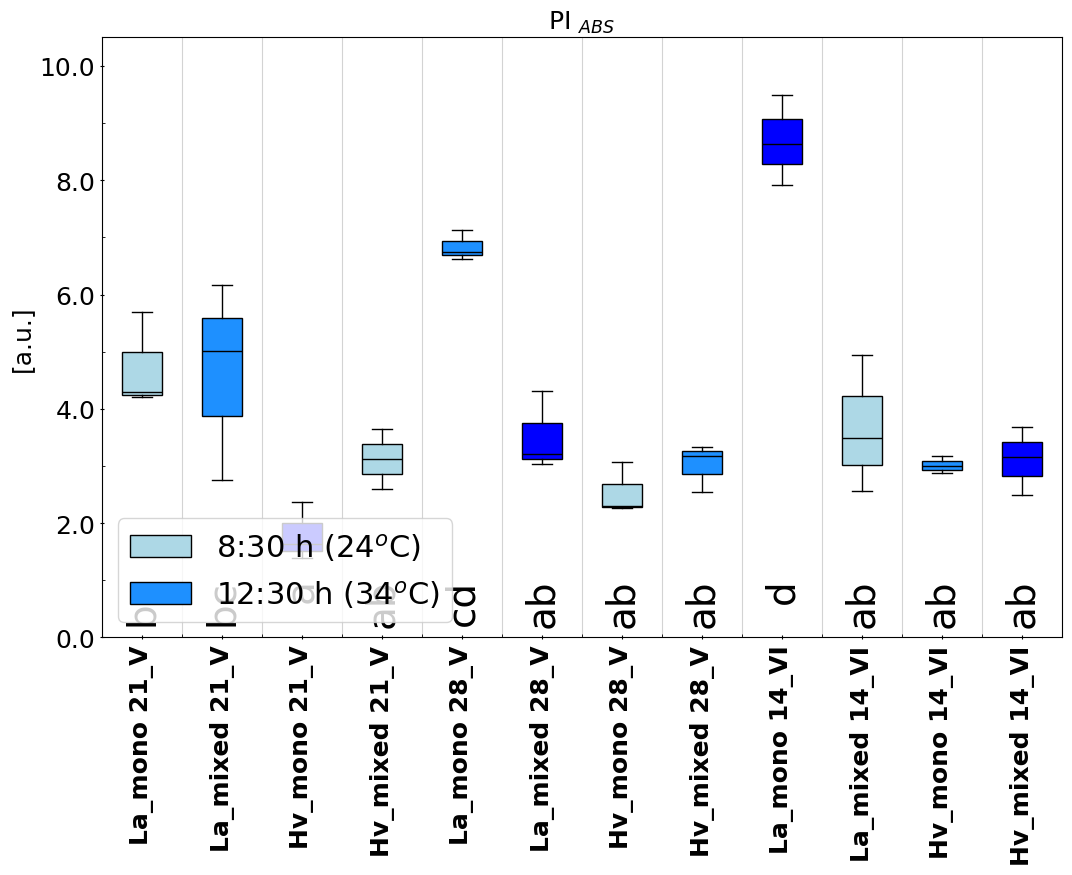

In [64]:
fig,ax=plt.subplots(figsize=(12,8))

if sorting:
  # For sorting !
  labels = group_order #pd.unique(data[variant]).astype(str)
  # create categorical data type and set categorical column as new data type
  dtype = pd.CategoricalDtype(labels, ordered=False)
  data[sorting_labels] = data[sorting_labels].astype(dtype)
  labels_new = [i[5:] for i in labels]

# Ensure 'Value' column is numeric before plotting
data['Value'] = pd.to_numeric(data['Value'], errors='coerce') # Converts to numeric, invalid values become NaN

bp_dict = data.boxplot(column=col_for_data, by=sorting_labels, ax=ax, fontsize=18, patch_artist = True,
            medianprops=dict(color='black'), # the median line
            boxprops=dict(color='black'),
            whiskerprops=dict(color='black')
            )
draw_letters(y_height, False, 1, fsize=28, rotation=90)

fill_colors = ['blue', 'dodgerblue', 'lightblue']
colors = ['white', 'yellowgreen', ]#'blue', 'dodgerblue']
children = []

for b in range(22):
  for a in range(3):
    repeated = np.tile(np.concatenate([np.repeat(i, j) for i, j
                                       # the median line
          in zip([fill_colors[a], 'black', 'black', 'black'], [1, 4, 1, 1])]), 1)
    colors = np.append(repeated, colors)

# OJIP graph
from matplotlib.patches import PathPatch

for patch, color in zip(bp_dict.get_children(), colors):
  if isinstance(patch, PathPatch):
    patch.set(facecolor = color)

# OJIP graph
children = [bp_dict.get_children()[0], bp_dict.get_children()[7],]
#            bp_dict.get_children()[14], bp_dict.get_children()[28]]

labels1=['$\it{L. albus}$ mono', '$\it{L. albus}$ mixed',
        '$\it{H. vulgare}$ mono', '$\it{H. vulgare}$ mixed']

labels=['8:30 h (24$^{o}$C)', '12:30 h (34$^{o}$C)']

#ax.set_xticklabels([i[5:] for i in group_order], fontsize=24, style='normal', weight='bold', rotation=90)
ax.set_xticks(np.arange(1., 1.*(len(group_order) + 1), 1.), labels=group_order, fontsize=12)
#[i[:2] for i in group_order[::2]]
ax.set_xticklabels(group_order, fontsize=18, style='normal', weight='bold', rotation=90)

plt.ylim(ymax=y_height)
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_ticks, fontsize=18, rotation=0)
ax.set_ylabel(y_label, fontsize=18)

ax.set(title='', ylabel=y_label, xlabel='')
ax.set_title(title_main, fontsize=18, rotation=0)

# OJIP graph
ax.legend(handles=children, labels=labels,
          loc='lower left', fontsize=22)

from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
minor_locator = AutoMinorLocator(2)
ax.xaxis.set_minor_locator(minor_locator)

# minor ticks
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
ax.yaxis.set_minor_locator(MultipleLocator(y_dist/2))
ax.tick_params(which="major", direction="inout")
ax.tick_params(which="minor", direction="in")

# OJIP graph
plt.grid(False)
ax.yaxis.grid(False)
ax.xaxis.grid(True, linestyle='-', which='minor', color='lightgrey', alpha=1)
fig.suptitle('')
fig.savefig(str(indexes.index(parameter)) +  '_' + ('_').join(parameter.split('/')) + '_' + csv_file.split('.')[0] + '.jpg',
            dpi=600, bbox_inches='tight')